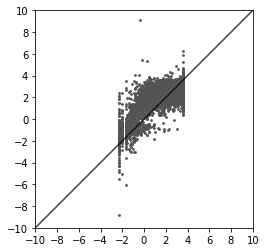

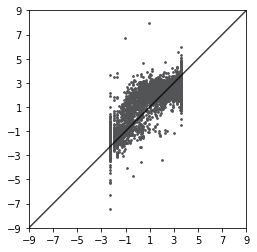

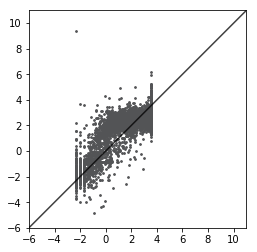

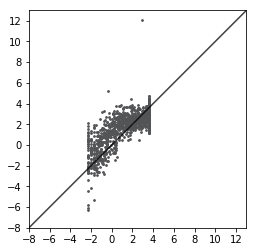

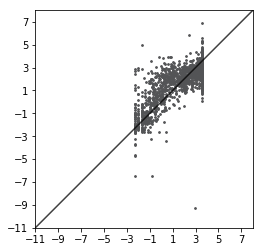

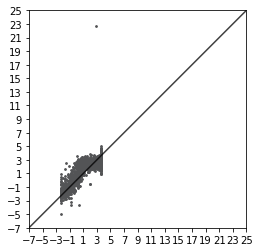

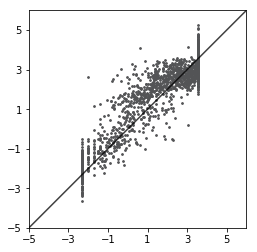

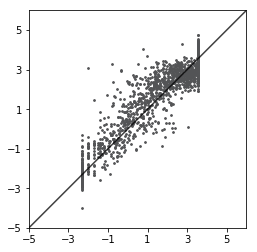

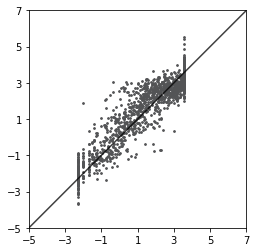

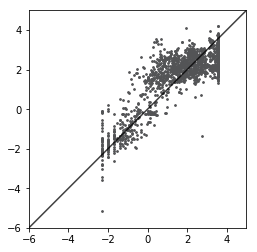

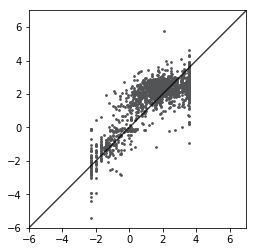

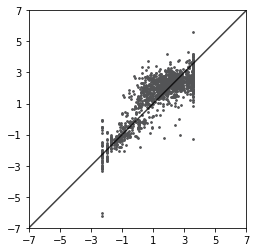

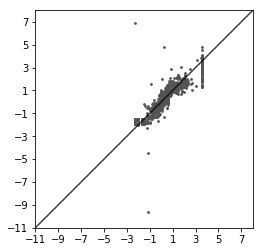

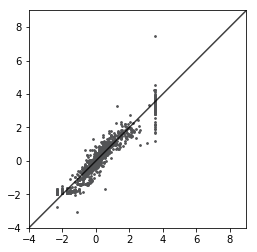

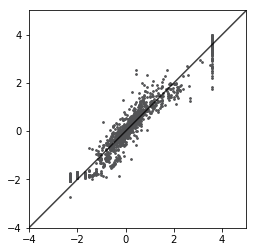

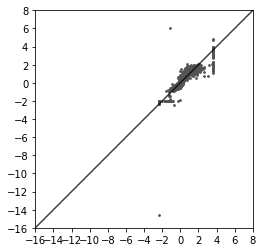

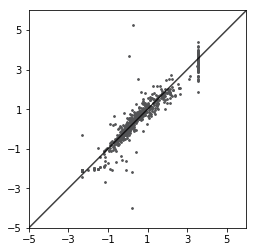

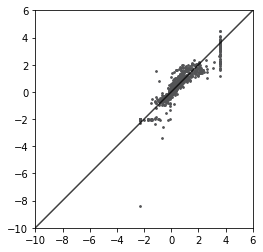

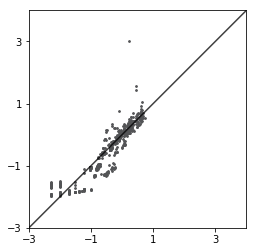

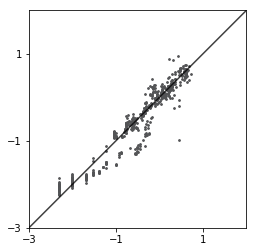

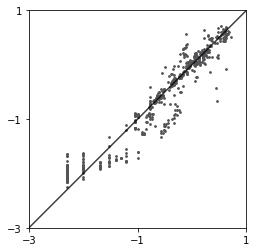

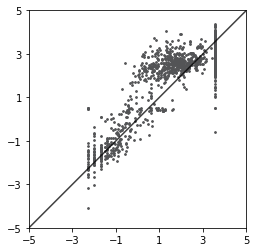

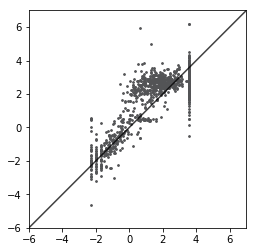

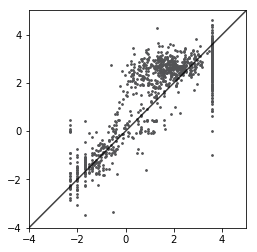

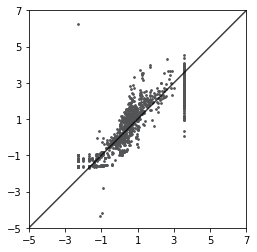

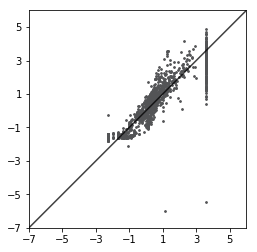

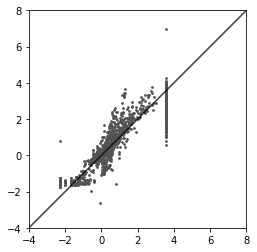

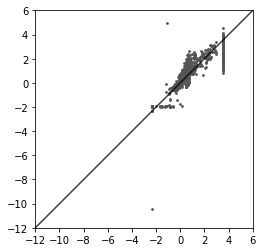

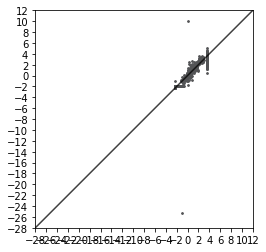

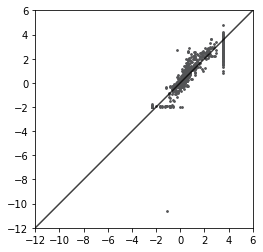

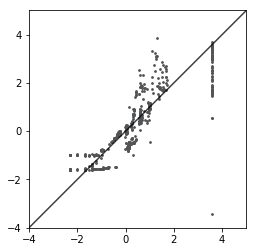

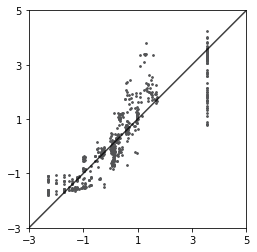

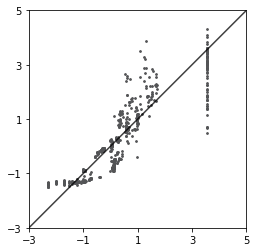

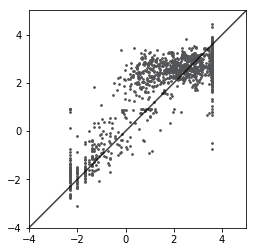

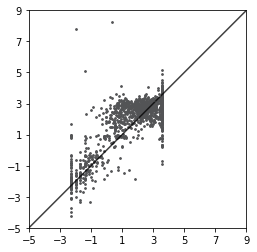

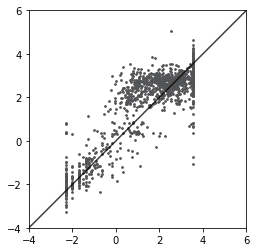

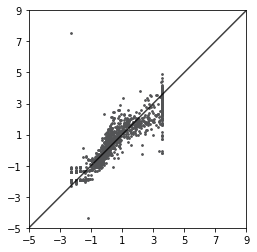

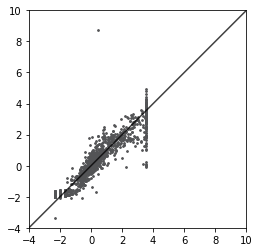

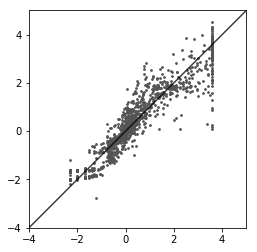

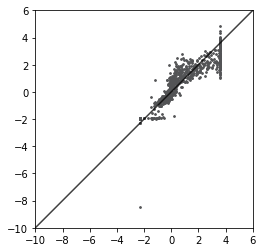

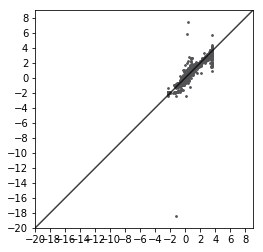

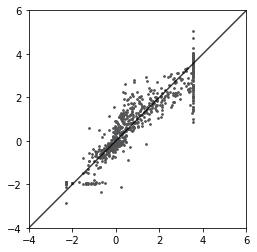

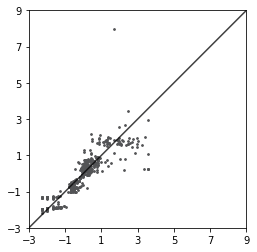

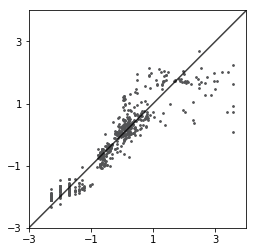

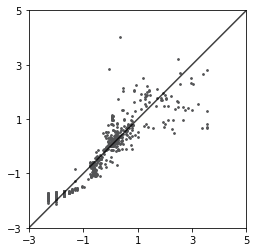

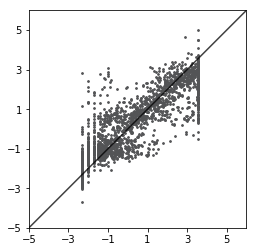

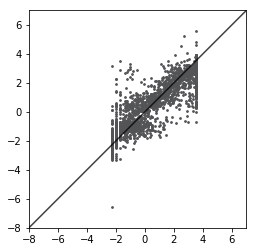

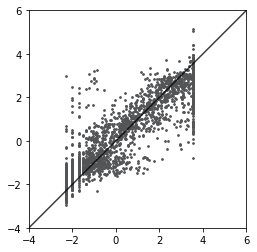

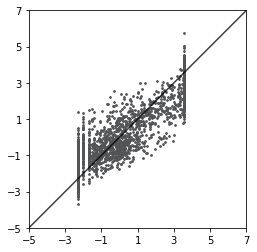

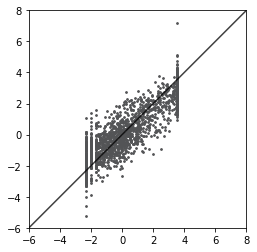

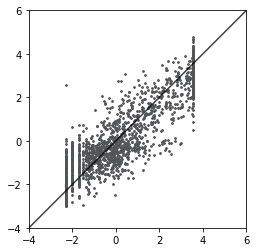

In [1]:
import pandas as pd
import numpy as np
from data_preprocessing import *
import matplotlib.pyplot as plt
# %matplotlib inline  

datasets = [
 'INDU-HAND-RAND-minisat',
  'SAT_Competition_RACE_HAND-minisat',
  'SAT_Competition_RACE_RAND-minisat',
  'SAT_Competition_RACE_INDU-minisat',
  'IBM-SWV-minisat',
  'IBM-ALL-minisat',
  'SWV-minisat',
  'SAT_Competition_RACE_INDU-cryptominisat',
  'IBM-SWV-cryptominisat',
  'IBM-ALL-cryptominisat',
  'SWV-cryptominisat',
  'SAT_Competition_RACE_INDU-spear',
  'IBM-SWV-spear',
  'IBM-ALL-spear',
  'SWV-spear',
  'SAT_Competition_RACE_RAND_SAT-tnm',
  'SAT_Competition_RACE_RAND_SAT-saps'
]
models = ['plain_ridge',
          'ridge_with_ffs_2',
          'ridge_with_rfe_2']
for dataset in datasets:
    for model in models:
        solver_times = pd.read_csv('data/' + dataset + '.csv', names=['INSTANCE_ID', 'SOLVER_TIME'])['SOLVER_TIME'].get_values()
        Y = log10_transform(solver_times)

        predictions = np.load('ridge_predictions/' + dataset + '_' + model + '.npy')
        fig, ax = plt.subplots()
        ax.scatter(Y, predictions, c='#535456', s=3)
        lims = [
            np.floor(np.min([ax.get_xlim(), ax.get_ylim()])), # min of both axes
            np.ceil(np.max([ax.get_xlim(), ax.get_ylim()])),  # max of both axes
        ]
        ax.set_xlim(lims)
        ax.set_ylim(lims)
        ax.plot(lims, lims, 'k-', alpha=0.75)
        ax.set_aspect('equal')
        plt.xticks(np.arange(lims[0], lims[1] + 1, step=2))
        plt.yticks(np.arange(lims[0], lims[1] + 1, step=2))
        plt.savefig(dataset + '---' + model)
        plt.show()

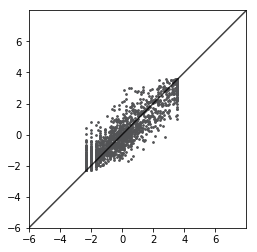

In [4]:
models = ['rf_5']
for dataset in datasets:
    for model in models:
        solver_times = pd.read_csv('data/' + dataset + '.csv', names=['INSTANCE_ID', 'SOLVER_TIME'])['SOLVER_TIME'].get_values()
        Y = log10_transform(solver_times)

        predictions = np.load('rf_predictions/' + dataset + '_' + model + '.npy')
        fig, ax = plt.subplots()
        ax.scatter(Y, predictions, c='#535456', s=3)
        lims = [
            np.floor(np.min([ax.get_xlim(), ax.get_ylim()])), # min of both axes
            np.ceil(np.max([ax.get_xlim(), ax.get_ylim()])),  # max of both axes
        ]
        ax.set_xlim(lims)
        ax.set_ylim(lims)
        ax.plot(lims, lims, 'k-', alpha=0.75)
        ax.set_aspect('equal')
        plt.xticks(np.arange(lims[0], lims[1] + 1, step=2))
        plt.yticks(np.arange(lims[0], lims[1] + 1, step=2))
        plt.savefig(dataset + '---' + model)
        plt.show()

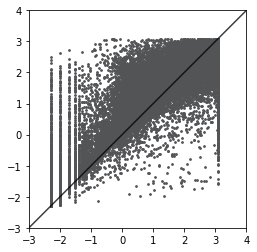

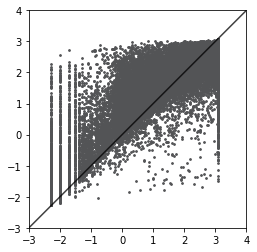

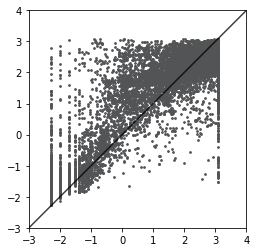

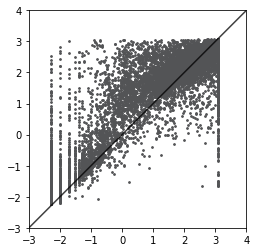

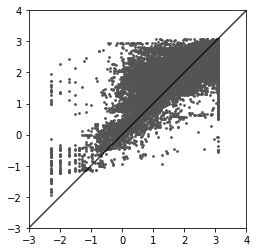

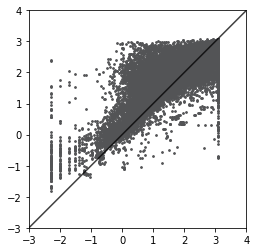

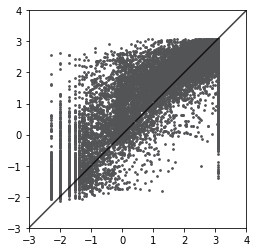

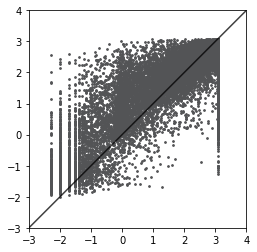

In [2]:
gcrf_datasets = [
  'SATALL12S',
  'SATHAND12S',
  'SATINDU12S',
  'SATRAND12S'
]
gcrf_models = ['tweaking_similarity_metaparam', 'svd_tweaking_metaparams']

for dataset in gcrf_datasets:
    for model in gcrf_models:
        data = pd.read_csv('SATzilla2012_data/' + dataset + '.csv')
        solver_times = data.filter(regex='_Time$', axis=1).get_values()
        Y = log10_transform(solver_times)

        gcrf_predictions = np.load('gcrf_predictions/' + dataset + '_gcrf_' + model + '.npy')

        fig, ax = plt.subplots()
        ax.scatter(Y, gcrf_predictions, c='#535456', s=3)
        lims = [
            np.floor(np.min([ax.get_xlim(), ax.get_ylim()])), # min of both axes
            np.ceil(np.max([ax.get_xlim(), ax.get_ylim()])),  # max of both axes
        ]
        ax.set_xlim(lims)
        ax.set_ylim(lims)
        ax.plot(lims, lims, 'k-', alpha=0.75)
        ax.set_aspect('equal')
        plt.xticks(np.arange(lims[0], lims[1] + 1, step=1))
        plt.yticks(np.arange(lims[0], lims[1] + 1, step=1))
        plt.savefig(dataset + '---gcrf_' + model)
        plt.show()

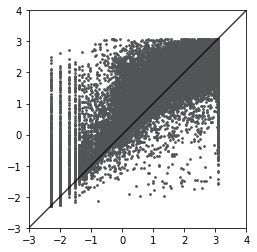

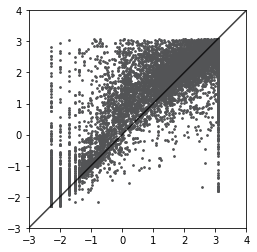

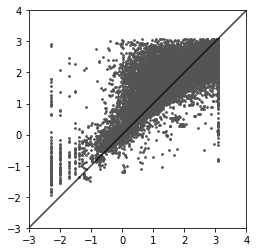

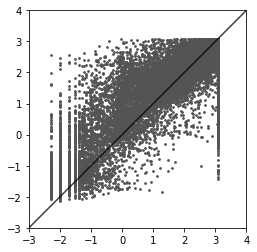

In [19]:
for dataset in gcrf_datasets:
    data = pd.read_csv('SATzilla2012_data/' + dataset + '.csv')
    solver_times = data.filter(regex='_Time$', axis=1).get_values()
    Y = log10_transform(solver_times)

    rf_predictions = np.load('gcrf_predictions/' + dataset + '_rf_tweaking_similarity_metaparam' + '.npy')

    fig, ax = plt.subplots()
    ax.scatter(Y, rf_predictions, c='#535456', s=3)
    lims = [
        np.floor(np.min([ax.get_xlim(), ax.get_ylim()])), # min of both axes
        np.ceil(np.max([ax.get_xlim(), ax.get_ylim()])),  # max of both axes
    ]
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    ax.plot(lims, lims, 'k-', alpha=0.75)
    ax.set_aspect('equal')
    plt.xticks(np.arange(lims[0], lims[1] + 1, step=1))
    plt.yticks(np.arange(lims[0], lims[1] + 1, step=1))
    plt.savefig(dataset + '---rf')
    plt.show()